Load some data

In [ ]:
import pandas as pd
final_database = pd.read_csv("path_to_final_database/feasibility_database.csv")


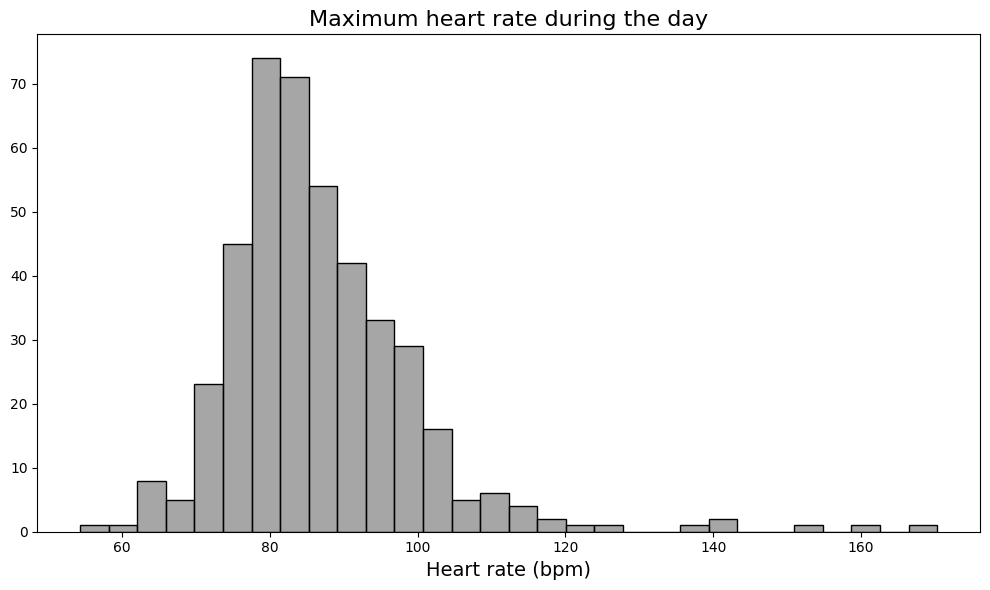

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

max_hr_col = 'HR_max_day_week0_corr'  # Change this to the actual column name

# Check if the maximal heart rate parameter exists
if max_hr_col in final_database.columns:
    plt.figure(figsize=(10, 6))

    # Create a histogram using seaborn
    sns.histplot(
        data=final_database,
        x=max_hr_col,
        bins=30,  # Adjust the number of bins as needed
        kde=False,  # Add a kernel density estimate (KDE) overlay
        color='grey',
        alpha=0.7,
    )

    # Customize plot appearance
    plt.title('Maximum heart rate during the day', fontsize=16)
    plt.xlabel('Heart rate (bpm)', fontsize=14)
    plt.ylabel('')
    plt.tight_layout()

    # Show the plot
    plt.show()
else:
    print(f"Column '{max_hr_col}' not found in the DataFrame.")

In [3]:
hr_col = 'HR_rest_night_week0'  # Change this to the actual column name
mean_max_hr = final_database[hr_col].mean()
std_max_hr = final_database[hr_col].std()
print(f"Mean maximum heart rate: {mean_max_hr:.2f} bpm")
print(f"Standard deviation of maximum heart rate: {std_max_hr:.2f} bpm")

Mean maximum heart rate: 61.40 bpm
Standard deviation of maximum heart rate: 8.06 bpm


Now in a function

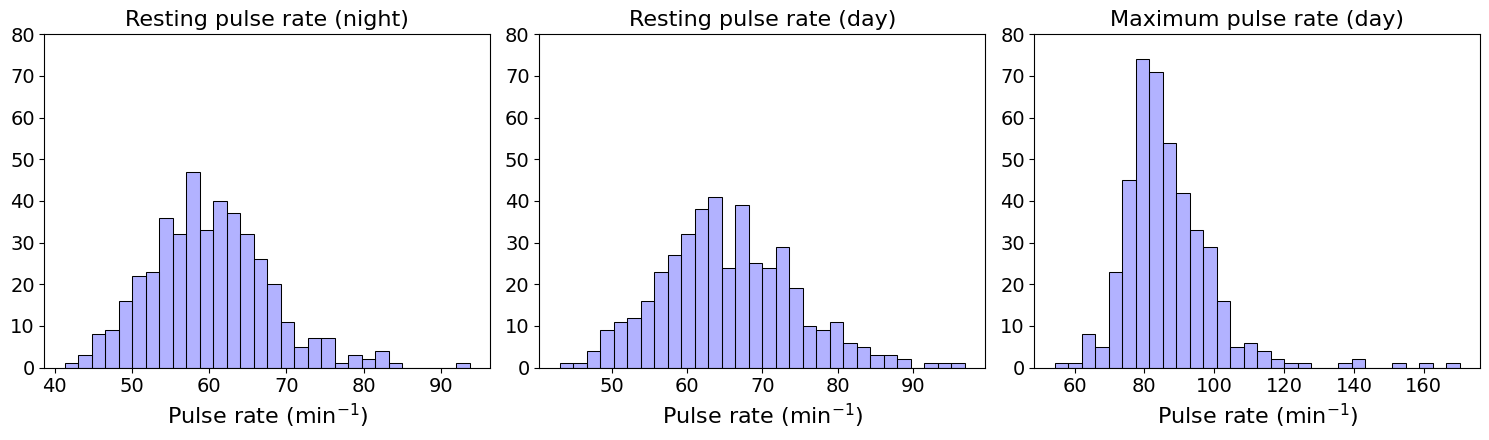

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_histograms(dataframe, columns, titles_to_plot, bins=30, figsize=(12, 6), kde=False, color='blue', output_path=None):
    """
    Plot histograms for specified columns in a DataFrame.

    Parameters:
    - dataframe (pd.DataFrame): The input DataFrame.
    - columns (list): List of column names to plot.
    - bins (int): Number of bins for the histogram (default: 30).
    - figsize (tuple): Figure size (default: (12, 6)).
    - kde (bool): Whether to overlay a KDE curve (default: False).
    - color (str): Color for the histogram (default: 'grey').
    """
    num_columns = len(columns)
    if num_columns == 0:
        print("No columns provided for plotting.")
        return

    # Create subplots
    fig, axes = plt.subplots(1, num_columns, figsize=(figsize[0], figsize[1] * num_columns))
    if num_columns == 1:
        axes = [axes]  # Ensure axes is iterable for a single plot

    for ax, col in zip(axes, columns):
        if col in dataframe.columns:
            sns.histplot(
                data=dataframe,
                x=col,
                bins=bins,
                kde=kde,
                color=color,
                alpha=0.3,
                ax=ax,
            )
            # Customize plot appearance
            ax.set_title(titles_to_plot[columns.index(col)], fontsize=16)
            ax.set_xlabel('Pulse rate (min$^{-1}$)', fontsize=16)
            ax.set_ylabel('')
            ax.set_ylim(0, 80)
            #set tick size
            ax.tick_params(axis='both', which='major', labelsize=14)
        else:
            print(f"Column '{col}' not found in the DataFrame.")
            ax.axis('off')  # Turn off axis for missing column

    # Adjust layout
    plt.tight_layout()
    if output_path is not None:
        plt.savefig(output_path, dpi=300, bbox_inches='tight')
    plt.show()

# Example usage
columns_to_plot = ['HR_rest_night_week0_corr', 'HR_rest_day_week0_corr', 'HR_max_day_week0_corr']  # Replace with your actual column names
titles_to_plot = ['Resting pulse rate (night)', 'Resting pulse rate (day)', 'Maximum pulse rate (day)']  # Optional: Specify custom titles
output_path = r"C:\Users\z863160\Documents\AI4P\PPG\Artikel feasibility\figs\final results 2.0\heart rate distributions\heart_rate_grouped.png"  # Replace with your desired file name
plot_histograms(final_database, columns_to_plot, titles_to_plot, bins=30, figsize=(15,1.5),  kde=False, color='blue', output_path=output_path)
